<img src="infoteclogo.png" width="240" height="240" align="left"/>

# TAREA 5

* Unidad: Modelación experimental
* Materia: Matemáticas para Ciencia de Datos
* Programa: Maestría en Ciencia de Datos e Información, INFOTEC
* Docente:  Juliho Castillo Colmenares, Sc.D.

### Equipo 5, Grupo E

* Santana Velázquez Gustavo
* Ramírez Olmeda David Aaron
* Ramírez Contreras Brayan Homero

## Lectura asignada

Del libro "Cai, X., Tveito, A., Langtangen, H. P., Nielsen, B. F. (2010). Elements of Scientific Computing. Germany: Springer Berlin Heidelberg", revisa el capítulo 5 "The Method of Least Squares".

## Instrucciones

1. Organízate con los miembros de tu equipo para comentar la lectura y la tarea.
2. Resuelvan el siguiente problema, desarrollando de manera clara y concisa todos y cada unos de los puntos.
3. Transcríbanlo a un archivo PDF utilizando un editor de textos y suban un único archivo por equipo. 
4. No se aceptarán trabajos escritos a mano, aun cuando estén digitalizados. 
5. Puedes utilizar software para resolver los problemas, pero en este caso deberás incluir el código en tu documento.
6. En cualquier caso, incluye el desarrollo completo de la solución. No se aceptarán respuestas sin justificación. 
7. Se considerará un inciso como incorrecto si el resultado no es el esperado, y se considerará incompleto si el resultado no está debidamente justificado.
8. Para acreditar el punto correspondiente a cada inciso, este deberá estar completo y ser correcto.

## Planteamiento del problema

En Internet, podemos encontrar información acerca de carros usados. En la tabla de abajo, hemos listado el precio de autos BMW usados de la serie 3 en Noruega. Se indica el precio promedio para un carro de 1 a 5 años de usado.

| Años $t_i$   | 1 | 2 | 3 | 4 | 5 |
|--------------|---|---|---|---|---|
| Precio $y_i$ | 55.2 | 44.9 | 37.9 | 35.3 | 30.1 |

Los precios están dados en miles de euros.

## Notas

1.   No es necesario trazar la gráfica, pero si lo haces, podrás observar si tu modelo se ajusta a los datos.
2.   Escribe de manera explicita los resultados obtenidos, es decir, los valores de los parámetros para cada inciso.
3.   Debes desarrollar tu procedimiento, de acuerdo a lo establecido en el libro de texto.
4.   No se validarán resultados que se obtengan con el uso de librerías externas de modelado de datos.

## Desarrollo

Los valores de los precios se definieron en una lista.

In [1]:
precios = [55.2, 44.9, 37.9, 35.3, 30.1]

### Inciso A

Construye un modelo lineal para los datos implementando en Python la fórmula 5.58 de la lectura, utilizando `Numpy` para realizar los cálculos.  Encuentra el modelo de regresión lineal para los datos de la tabla $(t_i, y_i)$.

La fórmula 5.58 del Capítulo 5 se refiere al sistema de ecuaciones lineales para determinar $\alpha$ y $\beta$. Que corresponde a los coeficientes de la aproximación por una función lineal de tipo $p_{1}(t)=\alpha+\beta t $ 

Donde las condiciones para determinar $\alpha$ y $\beta$ se encuentran dadas por: 

## $\frac{\partial F}{\partial \alpha} = \frac{\partial F}{\partial \beta} = 0$

Donde

$\frac{\partial F}{\partial \alpha} = 2\displaystyle \sum_{i=1}^{n}\left( \alpha+\beta t_{i} - y_{i} \right)$

y

$\frac{\partial F}{\partial \beta} = 2\displaystyle \sum_{i=1}^{n}\left( \alpha+\beta t_{i}-y_{i} \right)t_{i}$

Por lo tanto, obtenemos el sistema de ecuaciones determinado para  $\alpha$ y $\beta$

$\left(\begin{matrix} n & \displaystyle\sum_{i=i}^{n}t_{i} \\ \displaystyle\sum_{i=i}^{n}t_{i} & \displaystyle\sum_{i=i}^{n}t_{i}^{2} \end{matrix}  \right) \binom{\alpha}{\beta} = \left(\begin{matrix} \displaystyle\sum_{i=i}^{n}y_{i} \\ \displaystyle\sum_{i=i}^{n}t_{i}y_{i} \end{matrix}  \right)$

In [2]:
#Se importa la librería de Numpy
import numpy as np

def linear_model(arr):
    '''
    Esta función devuelve la predicción del modelo lineal
    y una lista con los tiempos. Obtiene una lista como 
    parámetro
    '''
    # Obtiene los valores de la lista de precios
    T = [i+1 for i in range(len(arr))]
    n = T[-1]

    # Obtiene la sumas
    t_i = sum(T)
    t2_i = sum([t**2 for t in T])

    y_i = sum(arr)
    ty_i = sum([t*y for t,y in zip(T, arr)])

    # Genera las matrices
    A = np.array([[n, t_i],
                 [t_i, t2_i]])
    b = np.array([y_i,ty_i])

#    print(f'ti {t_i}\nt2i {t2_i}\nyi {y_i}\ntyi {ty_i}')

    # Resolver el sistema de ecuaciones
    coefs = np.linalg.solve(A, b)

    # Obtiene los coeficiente del sistema
    print(f'p(t) = {coefs[0]:,.6} + {coefs[1]:,.6}t')
    res = [coefs[0] + coefs[1]*t for t in T]

    return res, T

In [3]:
lin_pred, T = linear_model(precios)

p(t) = 58.62 + -5.98t


### Entonces tenemos       $\alpha = -5.98 ,\beta = 58.62$

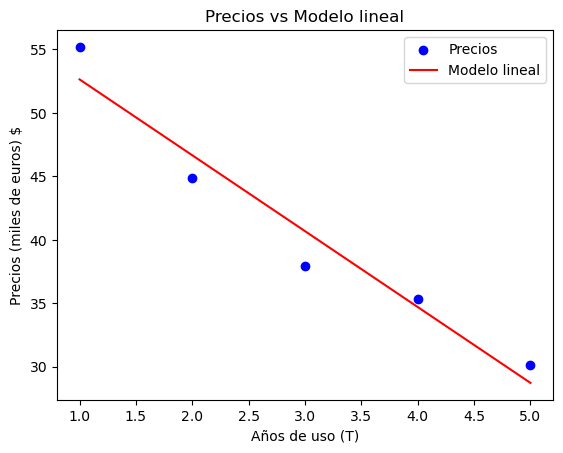

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(T, precios, label = 'Precios', color = 'blue')
ax.plot(T, lin_pred, label = 'Modelo lineal', color = 'red')

ax.legend()
ax.set_title('Precios vs Modelo lineal')
ax.set_xlabel('Años de uso (T)')
ax.set_ylabel('Precios (miles de euros) $')


plt.show()

En la gráfica anterior obtuvimos la representación del modelo lineal de la tabla del listado de precios de autos BMW usados de la serie 3 en Noruega. Podemos observar que la pendiente negativa representa el decremento del precio con respecto a los años de uso del automóvil.

La gráfica resultante muestra los puntos de datos de la tabla y la línea de regresión. Podemos ver que la línea de regresión se ajusta bastante bien a los datos, lo que sugiere que nuestro modelo lineal es un buen ajuste para estos.

### Inciso B

Construye un modelo cuadrático para los datos implementando en Python la fórmula 5.65 de la lectura, utilizando `Numpy` para realizar los cálculos. Encuentra el modelo de regresión cuadrática para los datos de la tabla $(t_i, y_i)$.

Una aproximación cuadrática para la forma $p_2(t) = \alpha + \beta t +\gamma t^2$ se conoce como aproximación por función cuadrática. 

Para determinar los coeficientes se define que

$F\left( \alpha,\beta,\gamma \right)= \displaystyle \sum_{i=1}^{10}\left( \alpha+\beta t_{i}+\gamma t^{2}_{i}-y_{i}\right)^{2}$

y las condiciones para F son

### $\frac{\partial F}{\partial \alpha} = \frac{\partial F}{\partial \beta} = \frac{\partial F}{\partial \gamma}=0$

Donde

$\frac{\partial F}{\partial \alpha} = 2\displaystyle \sum_{i=1}^{n}\left( \alpha+\beta t_{i} - \gamma t^{2}_{i}-y_{i} \right)$

$\frac{\partial F}{\partial \beta} = 2\displaystyle \sum_{i=1}^{n}\left( \alpha+\beta t_{i} - \gamma t^{2}_{i}-y_{i} \right)t_{i}$

$\frac{\partial F}{\partial \gamma} = 2\displaystyle \sum_{i=1}^{n}\left( \alpha+\beta t_{i} - \gamma t^{2}_{i}-y_{i} \right)t_{i}^{2}$

y se obtiene el siguiente sistema de ecuaciones

$\left(\begin{matrix} n & \displaystyle \sum_{i=1}^{n}t_{i} & \displaystyle \sum_{i=1}^{n}t^{2}_{i} \\ \displaystyle \sum_{i=1}^{n}t_{i} & \displaystyle \sum_{i=1}^{n}t^{2}_{i} & \displaystyle \sum_{i=1}^{n}t^{3}_{i} \\ \displaystyle \sum_{i=1}^{n}t_{i}^{2} & \displaystyle \sum_{i=1}^{n}t^{3}_{i} & \displaystyle \sum_{i=1}^{n}t^{4}_{i} \end{matrix}  \right)   \left(\begin{matrix} \alpha \\\beta  \\\gamma  \end{matrix}  \right) =  \left(\begin{matrix} \displaystyle \sum_{i=1}^{n}y_{i} \\ \displaystyle \sum_{i=1}^{n}y_{i}t_{i}  \\\displaystyle \sum_{i=1}^{n}y_{i}t_{i}^{2}  \end{matrix}  \right) $ 

Tal y como lo menciona la lectura del cápitulo 5, en la práctica no es recomendable aumentar el grado del polinomio tanto como queramos. Por ello, es mejor utilizar en algunos problemas el modelo de función cuadrática para ajustar datos.

In [5]:
def quadratic_model(arr):
    '''
    Esta función devuelve la predicción de un modelo cuadrático y
    una lista con los tiempos. Obtiene una lista como parámetro.
    '''
    # Obtiene los valores de la lista de precios
    T = [i+1 for i in range(len(arr))]
    n = T[-1]

     # Obtiene la sumas
    t_i = sum(T)
    t2_i = sum([t**2 for t in T])
    t3_i = sum([t**3 for t in T])
    t4_i = sum([t**4 for t in T])

    y_i = sum(arr)
    ty_i = sum([t*y for t,y in zip(T, arr)])
    t2y_i = sum([(t**2)*y for t,y in zip(T, arr)])

    # Crea las matrices
    A = np.array([[n, t_i, t2_i],
                 [t_i, t2_i, t3_i],
                 [t2_i, t3_i, t4_i]])
    b = np.array([y_i, ty_i, t2y_i])

    # Resolver el sistema de ecuaciones
    coefs = np.linalg.solve(A, b)

    # Obtiene los coeficiente del sistema
    print(f'p(t) = {coefs[0]:,.6} + {coefs[1]:,.6}t + {coefs[2]:,.6}t^2')
    res = [coefs[0] + coefs[1]*t + coefs[2]*(t**2) for t in T]

    return res, T

In [6]:
quad_pred, T = quadratic_model(precios)

p(t) = 65.92 + -12.2371t + 1.04286t^2


### Entonces tenemos $\alpha = 65.92 ,\beta = -12.2371, \gamma = 1.04286$

Además, podemos agregar que NumPy tiene una función llamada polyfit que se puede utilizar para ajustar una curva polinómica a un conjunto de datos, incluyendo una curva cuadrática. La función polyfit ajusta una curva polinómica de grado $n$ a los datos, devolviendo los coeficientes del polinomio en orden descendente.

En este caso, queremos ajustar una curva cuadrática, por lo que $n$ será igual a 2. Podemos usar la función polyfit de la siguiente manera:

In [7]:
# Encontrar los coeficientes de la curva cuadrática
t = np.array([1, 2, 3, 4, 5])
y = np.array([55.2, 44.9, 37.9, 35.3, 30.1])
coef = np.polyfit(t, y, 2)
print("Modelo cuadrático: p_2(t) = {:.2f} {:.2f}t + {:.2f}t^2".format(coef[2], coef[1], coef[0]))

Modelo cuadrático: p_2(t) = 65.92 -12.24t + 1.04t^2


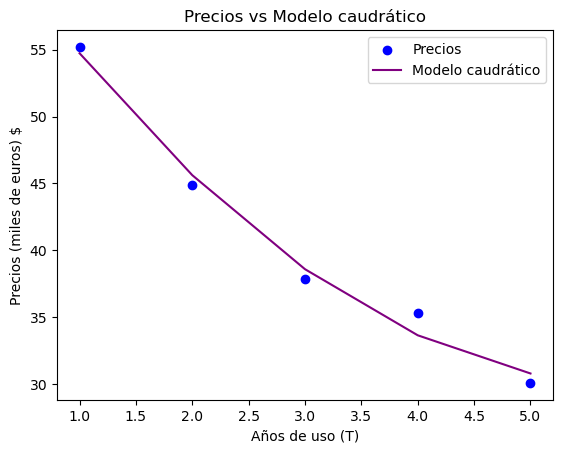

In [8]:
fig, ax = plt.subplots()
ax.scatter(T, precios, label = 'Precios', color = 'blue')
ax.plot(T, quad_pred, label = 'Modelo caudrático', color = 'purple')

ax.legend()
ax.set_title('Precios vs Modelo caudrático')
ax.set_xlabel('Años de uso (T)')
ax.set_ylabel('Precios (miles de euros) $')


plt.show()

Nuevamente nos percatamos de manera visual que nuestro modelo tiene un comportamiento bueno respecto a los datos de entrada, esto para el caso del modelo cuadrático. Se aprecia en la gráfica que la aproximación cuadrática se acerca para obtener el modelo que represente los puntos de los precios con respecto a los años de uso del automóvil. Cuando se ajusta una función a los datos utilizando el método de los mínimos cuadrados, se busca una función que minimice la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por la función.

### Inciso C

Ahora ajustaremos un modelo exponencial $p(t) = p_0 e^{\kappa t}$ a los datos. Tomando el logaritmo natural de ambos lados obtenemos $\ln(p(t))= \ln(p_0) + \kappa t.$ Si definimos $q(t)=\ln(p(t)), \lambda = \ln(p_0)$, entonces obtenemos un modelo lineal $q(t)=\lambda + \kappa t$.

Calcula la tabla para  $(t_i, \ln(y_i)),$ y calcula los parámetros de una regresión lineal $q(t)=\lambda + \kappa t$ para los datos de esta nueva tabla.

In [9]:
ln_y = [np.log(y) for y in precios]
#for y in ln_y:
#    print(f'{y:.5}',end = ' | ')

|$t_i$ | 1 | 2 | 3 | 4 | 5 |
|---|---|---|---|---|---|
| $\ln(y_i)$ | 4.011 | 3.8044 | 3.635 | 3.5639 | 3.4045 | 

In [10]:
lineal_ln_y, T = linear_model(ln_y)

p(t) = 4.11978 + -0.145343t


In [4]:
from scipy.optimize import curve_fit

def exp_func(x, a, b):
    return a * np.exp(-b * x)

x = np.array([1, 2, 3, 4, 5])
y = np.array([55.2, 44.9, 37.9, 35.3, 30.1])

popt, pcov = curve_fit(exp_func, x, y)
print("Parámetros a y b:", popt)

Parámetros a y b: [62.65859527  0.15179643]


Ajuste (A): 61.545769487181
Pendiente (B): -0.14534303938653975


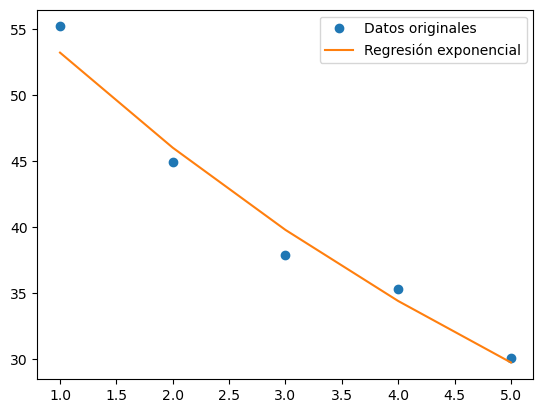

In [5]:
y_ln = np.log(y)

m, c = np.polyfit(x, y_ln, deg=1)
B = m
A = np.exp(c)

print("Ajuste (A):", A)
print("Pendiente (B):", B)

plt.plot(x, y, 'o', label='Datos originales')
plt.plot(x, A * np.exp(B * x), label='Regresión exponencial')
plt.legend()
plt.show()

### $\therefore \kappa = 4.11978, \lambda = -0.145343$

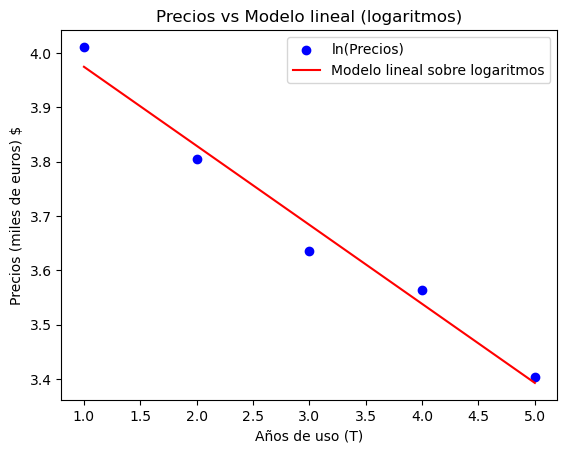

In [11]:
fig, ax = plt.subplots()
ax.scatter(T, ln_y, label = 'ln(Precios)', color = 'blue')
ax.plot(T, lineal_ln_y, label = 'Modelo lineal sobre logaritmos', color = 'red')

ax.legend()
ax.set_title('Precios vs Modelo lineal (logaritmos)')
ax.set_xlabel('Años de uso (T)')
ax.set_ylabel('Precios (miles de euros) $')


plt.show()

Basándonos en el gráfico, parece apropiado concluir que el resultado si es el ajuste de la aproximación ara una función lineal.

### Inciso D

Con los datos anteriores, determinar un modelo de regresión exponencial para los datos de la tabla $(t_i, y_i)$.

El modelo de regresión exponencial de acuerdo con la lectura en la fórmula 5.76 está dado por

$p'(t) =\alpha p(t)$

y para aproximar $p$ se utiliza la fórmula estándar

### $p'(t)\approx \frac{p(t+\Delta t)-p(t)}{\Delta t}$

Seleccionado $\Delta t =1$, estimamos $\alpha$ a partir de

### $\alpha_{n}= \frac{p(n+1)-p(n)}{p(n)}$

In [12]:
def exp_model(arr):
    # Obtiene los valores de la lista de precios
    T = [i+1 for i in range(len(arr))]
    p0 = arr[0]
    
    #Incremento delta t = 1 para estimar alpha
    alpha = sum([(arr[i+1] - arr[i])/arr[i] for i in range(len(arr)-1)]) / (len(arr)-1)

    # Obtiene los coeficiente del sistema
    print(f'p(t) = {p0:.5}^({alpha:.5}*t)')

    res = [p0*np.exp(alpha*t) for t in T]

    return res, T

In [13]:
exp_y, T = exp_model(precios)

p(t) = 55.2^(-0.1396*t)


### Entonces tenemos $p_{0} = 55.2 ,\alpha = -0.1396$

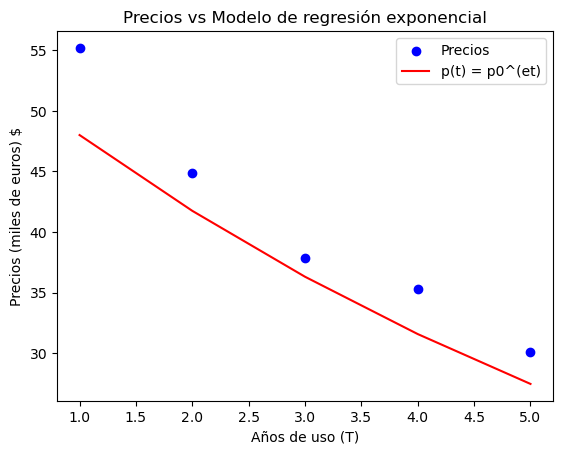

In [15]:
fig, ax = plt.subplots()
ax.scatter(T, precios, label = 'Precios', color = 'blue')
ax.plot(T, exp_y, label = 'p(t) = p0^(et)', color = 'red')

ax.legend()
ax.set_title('Precios vs Modelo de regresión exponencial')
ax.set_xlabel('Años de uso (T)')
ax.set_ylabel('Precios (miles de euros) $')


plt.show()

A partir del gráfico obtenido, se aprecia una función exponencial que sutilmente modela mejor los datos al disminuir exponencialmente. Este modelo se puede utilizar para modelar situaciones donde la tasa de cambio es proporcional al valor actual, como el crecimiento o la descomposición de una población. 

Con respecto a la anteriores, una función exponencial puede modelar mejor la tendencia a largo plazo de los datos y puede ser más precisa en la predicción de valores futuros. En comparación con una función cuadrática, una función exponencial puede tener una tasa de cambio que disminuye o aumenta más rápidamente, lo que puede ser más apropiado para modelar situaciones que cambian exponencialmente.

En conclusión general, al igual que con cualquier otro modelo de aproximación, es importante tener en cuenta que la elección de del modelo debe basarse en la naturaleza de los datos y el conocimiento del problema, ya que puede haber casos en los que ciertos modelos de aproximación puedan ser más apropiados. Además, la selección de un modelo lineal, cuadrático o exponencial también puede conducir a un sobreajuste si no se aplica correctamente, lo que puede resultar en una pobre generalización co nuevos datos.

### Referencias

* Tveito, A. (2010). *Elements of scientific computing*. Springer.
* Deshpande, R. (2019, noviembre 29). *How to insert python variable into Latex matrix in Jupyter notebook markdown cell?* [Mensaje en un foro en línea]. Stack Overflow. https://stackoverflow.com/questions/59098171/how-to-insert-python-variable-into-latex-matrix-in-jupyter-notebook-markdown-cel

* NumPy Developers. (2022). numpy.polyfit. *NumPy*. https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

* NumPy Developers. (2022). numpy.linalg.solve. *NumPy*. https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html